In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from imblearn.under_sampling import RandomUnderSampler
import pathlib
import os

In [2]:
def savefig(file_name, figure=None):
    home = pathlib.Path().home()
    savedir = "Documents/daniel-ethridge.github.io/src/assets/ml-assets/svm"
    if not figure:
        plt.savefig(os.path.join(home, savedir, file_name + ".png"))
    else:
        figure.savefig(os.path.join(home, savedir, file_name + ".png"))

In [3]:
# Read in the data
df = pd.read_csv("../unsynced-data/lastfm-spotify-merged.csv")
df = df.drop(["Unnamed: 0", "hot_100", "lastfm_id", "artist", "title", "lfm_similars", "lfm_tags", "spotify_id",
              "manual_check", "mode"], axis=1)
df

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,valence,tempo
0,0.000058,0.229,0.9050,0.934000,-6.434,0.0698,0.1770,92.239
1,0.340000,0.533,0.3020,0.179000,-10.308,0.0307,0.2950,134.971
2,0.993000,0.223,0.0321,0.934000,-30.272,0.0338,0.0598,110.805
3,0.897000,0.623,0.3890,0.000000,-7.043,0.0347,0.4810,94.596
4,0.543000,0.656,0.4520,0.000010,-7.170,0.0262,0.5880,112.962
...,...,...,...,...,...,...,...,...
152724,0.788000,0.772,0.4340,0.120000,-13.834,0.0680,0.9400,126.514
152725,0.009460,0.476,0.9020,0.865000,-7.701,0.0716,0.3710,147.555
152726,0.012800,0.513,0.6510,0.000198,-7.120,0.0360,0.3510,151.845
152727,0.684000,0.334,0.1360,0.000000,-20.145,0.0369,0.1640,105.034


In [4]:
df["instrumental"] = df["instrumentalness"].apply(lambda x: 0 if x <= 0.5 else 1)
df_inst = df.copy()
df_inst.head(20)

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,valence,tempo,instrumental
0,0.000058,0.229,0.9050,0.934000,-6.434,0.0698,0.1770,92.239,1
1,0.340000,0.533,0.3020,0.179000,-10.308,0.0307,0.2950,134.971,0
2,0.993000,0.223,0.0321,0.934000,-30.272,0.0338,0.0598,110.805,1
3,0.897000,0.623,0.3890,0.000000,-7.043,0.0347,0.4810,94.596,0
4,0.543000,0.656,0.4520,0.000010,-7.170,0.0262,0.5880,112.962,0
5,0.000001,0.127,0.9660,0.905000,-7.286,0.0788,0.4060,170.117,1
6,0.281000,0.738,0.2860,0.001430,-15.878,0.0925,0.6110,115.844,0
7,0.002820,0.801,0.4960,0.831000,-7.959,0.0840,0.5140,124.008,1
8,0.018300,0.681,0.7350,0.002450,-8.901,0.0534,0.2140,128.018,0
9,0.345000,0.674,0.7450,0.822000,-11.221,0.0358,0.9720,109.998,1


In [5]:
df_inst = df_inst.drop(["instrumentalness"], axis=1)
df_inst.head(20)

,acousticness,danceability,energy,loudness,speechiness,valence,tempo,instrumental
0,0.000058,0.229,0.9050,-6.434,0.0698,0.1770,92.239,1
1,0.340000,0.533,0.3020,-10.308,0.0307,0.2950,134.971,0
2,0.993000,0.223,0.0321,-30.272,0.0338,0.0598,110.805,1
3,0.897000,0.623,0.3890,-7.043,0.0347,0.4810,94.596,0
4,0.543000,0.656,0.4520,-7.170,0.0262,0.5880,112.962,0
5,0.000001,0.127,0.9660,-7.286,0.0788,0.4060,170.117,1
6,0.281000,0.738,0.2860,-15.878,0.0925,0.6110,115.844,0
7,0.002820,0.801,0.4960,-7.959,0.0840,0.5140,124.008,1
8,0.018300,0.681,0.7350,-8.901,0.0534,0.2140,128.018,0
9,0.345000,0.674,0.7450,-11.221,0.0358,0.9720,109.998,1


<Axes: xlabel='instrumental', ylabel='count'>

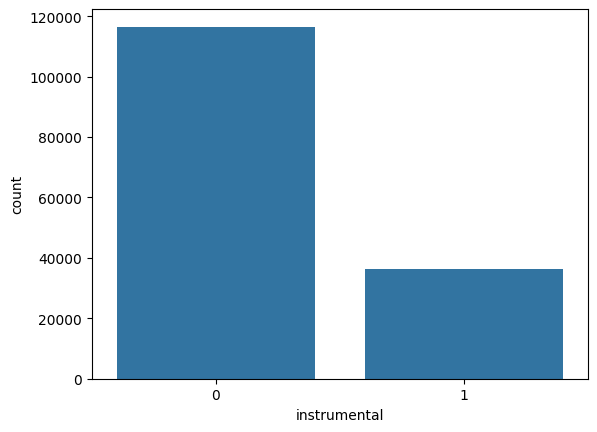

In [6]:
df_labels = df_inst["instrumental"]
df_data = df_inst.drop("instrumental", axis=1)
sns.countplot(x=df_labels)

<Axes: xlabel='instrumental', ylabel='count'>

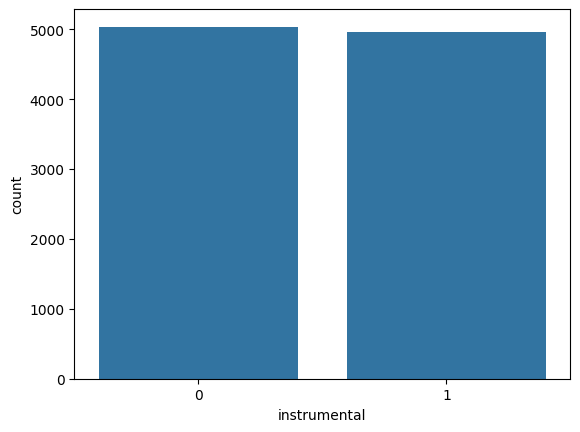

In [12]:
# Use RandomUnderSampler (from imblearn) to balance the data
samp = RandomUnderSampler()
samp_data, samp_labels = samp.fit_resample(df_data, df_labels)
samp_data["instrumental"] = samp_labels
samp_data = samp_data.sample(10000)
samp_labels = samp_data["instrumental"]
samp_data = samp_data.drop("instrumental", axis=1)
sns.countplot(x=samp_labels)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(samp_data, samp_labels)

Moving to kernel linear and c=1
Moving to kernel rbf and c=1
Moving to kernel sigmoid and c=1
Moving to kernel linear and c=20
Moving to kernel rbf and c=20
Moving to kernel sigmoid and c=20
Moving to kernel linear and c=100
Moving to kernel rbf and c=100
Moving to kernel sigmoid and c=100


,Kernel,C Value,Accuracy,Recall,Precision,F1 Score
0,linear,1,0.6908,0.652801,0.665513,0.678729
1,rbf,1,0.6272,0.535654,0.575205,0.621063
2,sigmoid,1,0.5472,0.571307,0.543180,0.517692
3,linear,20,0.6908,0.659593,0.667813,0.676240
4,rbf,20,0.6632,0.629881,0.638005,0.646341
5,sigmoid,20,0.5436,0.561969,0.537120,0.514375
6,linear,100,0.6864,0.657895,0.664096,0.670415
7,rbf,100,0.6892,0.668930,0.669783,0.670638
8,sigmoid,100,0.5440,0.562818,0.537713,0.514752


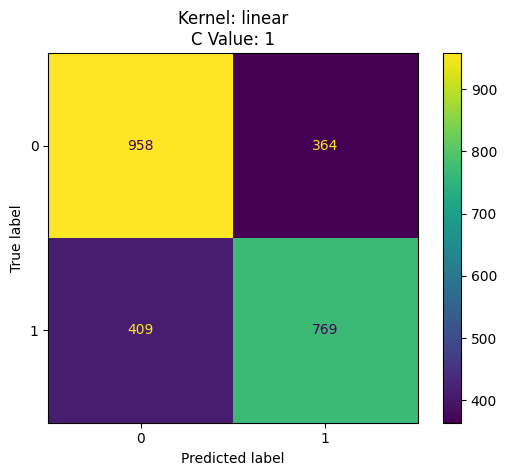

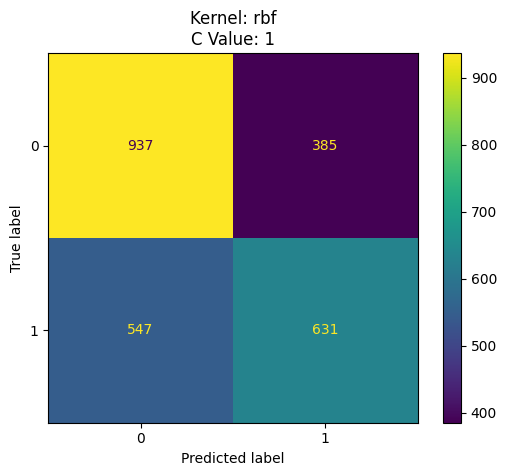

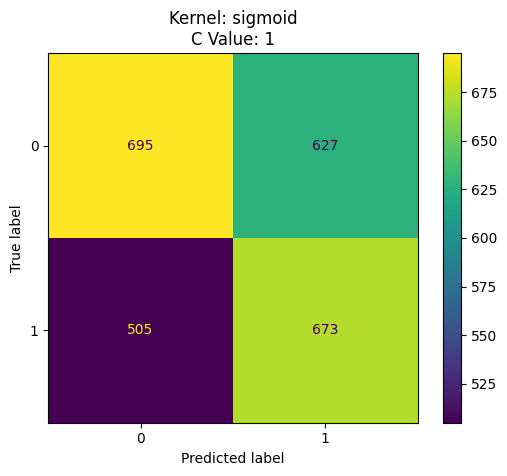

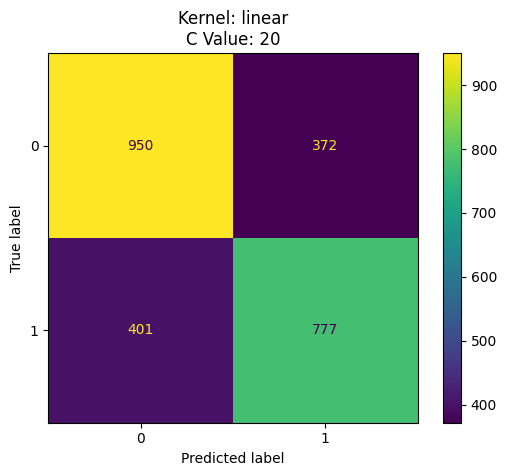

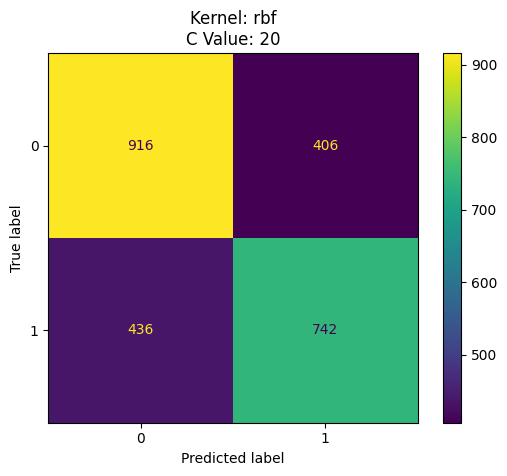

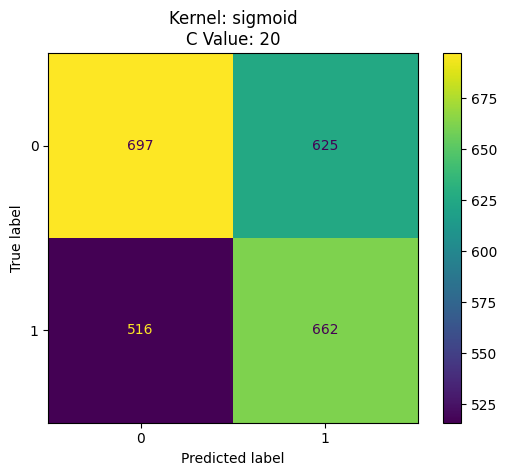

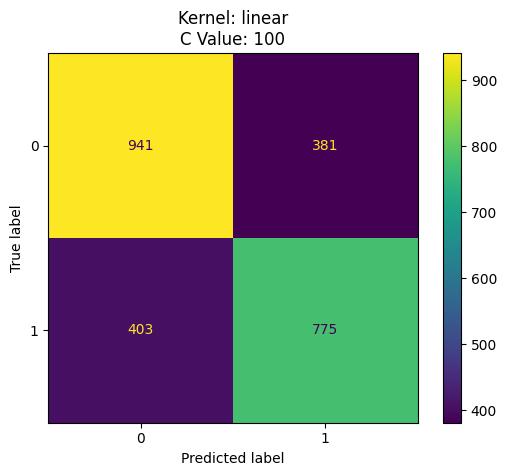

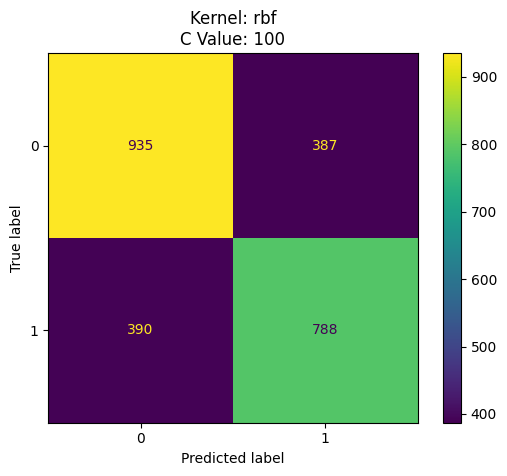

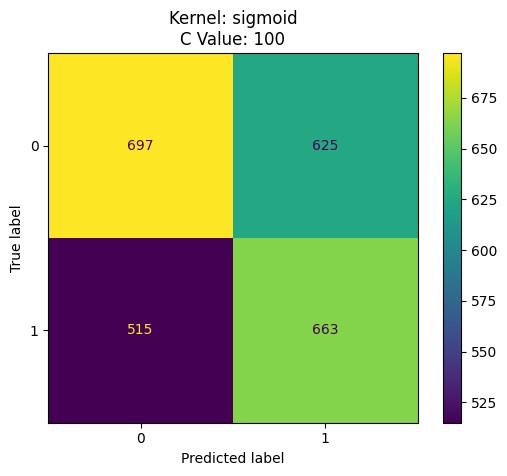

In [11]:
C_values = np.array([1, 20, 100])
kernels = ["linear", "rbf", "sigmoid"]
data = {"Kernel": [],
       "C Value": [],
       "Accuracy": [],
       "Recall": [],
       "Precision": [],
       "F1 Score": []}

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

for c in C_values:
    for kern in kernels:
        print(f"Moving to kernel {kern} and c={c}")
        svm_model = SVC(C=c, kernel=kern)
        svm_model.fit(x_train, y_train)
        y_pred = svm_model.predict(x_test)
        data["Kernel"].append(kern)
        data["C Value"].append(c)
        data["Accuracy"].append(accuracy_score(y_test, y_pred))
        data["Recall"].append(recall_score(y_test, y_pred))
        data["Precision"].append(f1_score(y_test, y_pred))
        data["F1 Score"].append(precision_score(y_test, y_pred))
        conf_mat = confusion_matrix(y_test, y_pred)
        ConfusionMatrixDisplay(conf_mat).plot()
        plt.title(f"Kernel: {kern}\nC Value: {c}")
        savefig(f"svm-{kern}-{c}")
        
results_df = pd.DataFrame(data)
results_df